In [1]:
import svm


orig_data = svm.generate_subsequences(svm.load_data('data/Ind1_train/Subject_2_part1.csv'))

labels = orig_data['hypo30m']
data = orig_data.drop('hypo30m', 1)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

csv_header = ['t0_time', 't1_time', 't2_time', 't3_time', 't4_time', 't5_time', 't6_time', 't0_glucose', 't1_glucose', 't2_glucose', 't3_glucose', 't4_glucose', 't5_glucose', 't6_glucose', 't0_slope', 't1_slope', 't2_slope', 't3_slope', 't4_slope', 't5_slope', 't6_slope', 't0_iob', 't1_iob', 't2_iob', 't3_iob', 't4_iob', 't5_iob', 't6_iob', 't0_mob', 't1_mob', 't2_mob', 't3_mob', 't4_mob', 't5_mob', 't6_mob', 't0_morning', 't1_morning', 't2_morning', 't3_morning', 't4_morning', 't5_morning', 't6_morning', 't0_afternoon', 't1_afternoon', 't2_afternoon', 't3_afternoon', 't4_afternoon', 't5_afternoon', 't6_afternoon', 't0_evening', 't1_evening', 't2_evening', 't3_evening', 't4_evening', 't5_evening', 't6_evening', 't0_night', 't1_night', 't2_night', 't3_night', 't4_night', 't5_night', 't6_night']

      t0_time  t1_time  t2_time  t3_time  t4_time  t5_time  t6_time  \
0          23       23       23       23       23       23       23   
1          23       23       23       23       23       23       23   
2          23       23       23       23       23       23       23   
3          23       23       23       23       23       23       23   
4          23       23       23       23       23       23        0   
5           1        1        1        1        1        2        2   
6           1        1        1        1        2        2        2   
7           1        1        1        2        2        2        2   
8           1        1        2        2        2        2        2   
9           1        2        2        2        2        2        2   
10          2        2        2        2        2        2        2   
11          2        2        2        2        2        2        2   
12          2        2        2        2        2        2        2   
13    

In [2]:
#data = pd.read_csv('data/subject7_instances.csv', header=None, names=csv_header)

In [3]:
rows, features = data.shape
print "Rows: {}, Features: {}".format(rows,features)

Rows: 3132, Features: 63


In [4]:
drop_cols = csv_header[csv_header.index('t0_morning'):]
data.drop(drop_cols, inplace=True, axis=1)


#s2_data.drop(drop_cols, inplace=True, axis=1)

In [5]:
rows, features = data.shape
print "Rows: {}, Features: {}".format(rows,features)

Rows: 3132, Features: 35


In [6]:
scaled_data = scale(data)
scaled_data.shape

(3132, 35)

In [7]:
km_estimator = KMeans(init='random', n_init=10, n_clusters = 100)
#km_estimator = KMeans(init='random', n_init=10, n_clusters = 300)

In [8]:
km_estimator.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
allocations = km_estimator.labels_
centers = km_estimator.cluster_centers_
PARAM_ANOMALY_THRESHOLD = 5.935120307219966

#3 standard deviation
anomalies = []

In [11]:
dists = []

drop_ind = csv_header.index('t6_time')

correct = 0
false_positive = 0

for i, point in enumerate(scaled_data):
    assigned_cluster_center = centers[allocations[i]]
    diff = assigned_cluster_center[drop_ind:] - point[drop_ind:]
    dist = np.dot(diff,diff)**0.5
    if(dist != 0):
        dists.append(dist)
    if(dist > PARAM_ANOMALY_THRESHOLD):
        anomalies.append(i)
        if(labels[i] == 1):
            correct += 1
        else:
            false_positive += 1

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


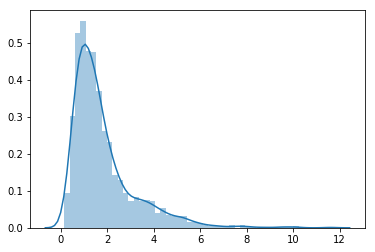

In [12]:
sns.distplot(dists)

In [13]:
len(anomalies)

51

In [14]:
ds = np.array(dists)
ds.mean() + 3*ds.std()

5.947474594564173

In [15]:
len(anomalies) / float(scaled_data.shape[0])

0.016283524904214558

In [16]:
correct

1

In [17]:
false_positive

50

In [18]:
scaled_data.shape[0]

3132

In [19]:
labels.value_counts()

0    3099
1      33
Name: hypo30m, dtype: int64